# Identifying Faces using principal component analysis
### Introduction:
Consider a small image that is only 64x64.
It seems very small, but inherently it is a very high-dimensional object!
Images usually come as matrices, but if you stack all the rows of an image together you can convert an image to a long row-vector. For example a 64x64 image can be represented as a row-vector of length 4096! That means the image is actually an object in a 4096 dimensional space ($R^{4096}$)!
Now, consider a collection of thousands of 64x64 images that only include faces of people.
All these image are objects in a 4096 dimensional space.
But, what if they are all grouped in a lower-dimensional subspace of ($R^{4096}$).
Even though faces of different people look very different, but there is also a lot in common between faces.
The general shape and position of nose, eyes, ears, lips and other features of face is almost same in most people.
So, it is very likely that dimensionality of images of faces is inherently lower than 4096.

We will use principal component analysis (PCA) to identify the eigen-values of face images also known as eigen-faces. Then we will explore whether the dimensionality of the images is lower or not.

You can find more information about eigen-faces and it's applications in facial recognition here:  
https://en.wikipedia.org/wiki/Eigenface


In [1]:
#Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the data
The dataset is provided in the assignment portal in microsoft teams, please extract the data set and copy in in your python working directory. All the images should be in a folder named 'faces' in your python working directory. Then run the following cell to read the first 1000 images from the dataset. Explain how these commands are able to read the data.

In [2]:
#Run this cell to read the data
photos = os.listdir('faces')[1:1001]
#allocating the first 1000 images (in alphabetical order) in the folder 'faces' to the variable 'photos'
images = np.zeros((1000,64,64))
#vector of 1000 length with each element being a 64x64 zeros matrix
for i in range (0,1000):
    images [i,:,:] = plt.imread('faces/'+photos[i])
    #convert each of the 1000 images in variable 'photos' to a 64x64 image matrix
print(images)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'faces'

### Visualizing the first 25 images

The images are stored in a 3-dimensional NumPy array (1000,64,64). You can access the images by slicing the array. For example you can access the first image by:

In [3]:
#slicing images
First_image = images[ 0 , : , : ] 

NameError: name 'images' is not defined

You can use plt.imshow() to visualize an image:

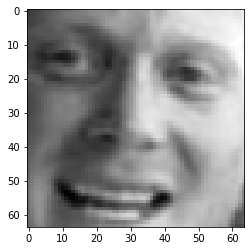

In [4]:
#Visualizing an image
plt.imshow(images[0,:,:],cmap=plt.cm.gray)

Using plt.subplots(), visualize the firs 25 images of the dataset in A 5$\times5$ grid. Remove the xticks and yticks from images. The output should be similar to provided image:

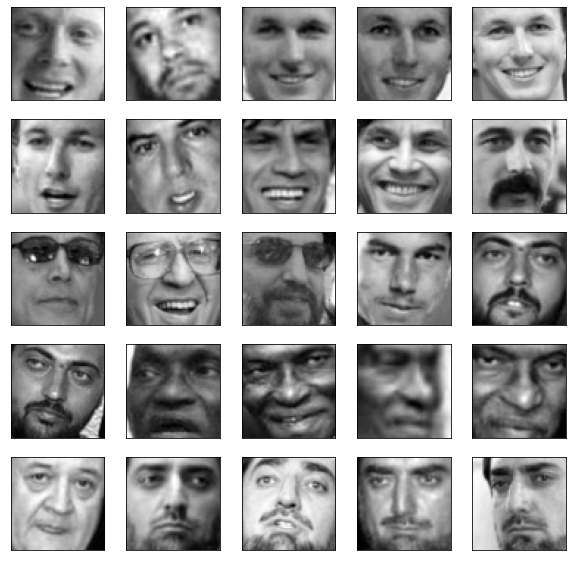

In [5]:

plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i,:,:],cmap=plt.cm.gray)
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)


### Conducting principal component analysis


__Vectorize the images__ To conduct principal component analysis we need to vectorize images. That means we should reshape the dataset from a 3D NumPy array (1000,64,64) to a 2D NumPy array of shape (1000,4096). Each line of this 2D array contains a vectorized image.

In [53]:
#vectorized the images here
images_1=np.zeros((1000,4096))
for i in range(0,1000):
    images_1[i]=np.ravel(images[i,:,:])
print(np.shape(images_1))
images_1

(1000, 4096)


array([[ 53.,  56.,  59., ...,  62.,  64.,  72.],
       [122., 128., 130., ...,  69.,  67.,  66.],
       [ 90., 112., 132., ..., 169., 209., 235.],
       ...,
       [  4.,   2.,   2., ..., 110., 114., 114.],
       [  8.,  14.,  26., ...,   8.,   4.,   2.],
       [ 70.,  67.,  82., ..., 102., 155., 197.]])

__Mean_subtraction and visualize the mean image__ calculate the mean image by using .mean(). The result should be (4096,1) vector. Then subtract it from vectorized images.  
Note that we do not need to scale the images, the reason is that pixel intensities are in the same scale.

In [54]:
#Calculate and subtract the mean
images_1_mean=np.resize(np.mean(images_1, axis=0),(4096,1))
images_1_mean_mat=np.zeros((1000,4096))
for i in range(0,4096):
    images_1_mean_mat[:,i]=images_1[:,i] - images_1_mean[i]
print(np.shape(images_1_mean))
images_1_mean

(4096, 1)


array([[101.71],
       [105.26],
       [109.55],
       ...,
       [ 93.33],
       [ 92.56],
       [ 92.32]])

Then using plt.imshow to visualize the mean image.
* Inorder to visualize the mean image, need to reshape the mean image from (4096,1) to (64,64).
* Use cmap=plt.cm.gray in plt.imshow() command to have a better visualization.

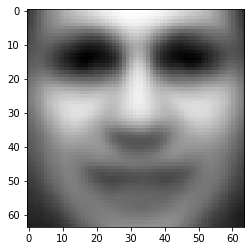

In [48]:
#Visualize the mean image
mean_image = np.reshape(images_1_mean,(64,64))
plt.imshow(mean_image,cmap=plt.cm.gray)

In [38]:
new_images = np.zeros((1000,64,64))
for i in range(0,1000):
    new_images[i,:,:]=np.reshape(images_1_mean_mat[i,:], (64,64))
new_images

array([[[-4.87e+01, -4.93e+01, -5.05e+01, ...,  6.30e+01,  6.80e+01,
          7.63e+01],
        [-4.81e+01, -4.76e+01, -4.89e+01, ...,  6.19e+01,  6.81e+01,
          7.77e+01],
        [-4.75e+01, -4.79e+01, -4.93e+01, ...,  6.42e+01,  6.94e+01,
          7.89e+01],
        ...,
        [-9.16e+00, -7.09e-01,  1.10e+01, ..., -2.13e+01, -1.93e+01,
         -1.31e+01],
        [-8.54e+00, -2.05e+00,  8.70e+00, ..., -2.42e+01, -1.93e+01,
         -1.12e+01],
        [-8.63e+00, -4.21e+00,  4.38e+00, ..., -3.13e+01, -2.86e+01,
         -2.03e+01]],

       [[ 2.03e+01,  2.27e+01,  2.05e+01, ..., -2.90e+01, -3.30e+01,
         -3.57e+01],
        [ 1.79e+01,  2.24e+01,  2.31e+01, ..., -2.51e+01, -2.89e+01,
         -3.33e+01],
        [ 1.15e+01,  1.71e+01,  2.07e+01, ..., -1.98e+01, -2.56e+01,
         -3.11e+01],
        ...,
        [ 8.84e+00,  6.29e+00,  3.99e+00, ..., -2.63e+01, -2.53e+01,
         -2.41e+01],
        [ 1.15e+01,  8.95e+00,  6.70e+00, ..., -2.62e+01, -2.63e+01,
   

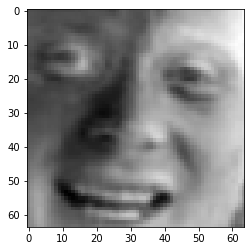

In [49]:
plt.imshow(new_images[0,:,:],cmap=plt.cm.gray)

__Calculating covariance matrix and its eigen-values and eigen-vectors__   
Calculate the covariance matrix of vectorized images. The result should be (4096,4096) matrix.

In [52]:
#Calculate the covariance matrix of the vectorized images
C = np.cov(images_1.T)
print(np.shape(C))
C

(4096, 4096)


array([[2852.06, 2747.06, 2533.05, ...,   22.45,    4.5 ,  -14.13],
       [2747.06, 2798.08, 2668.4 , ...,    5.1 ,  -14.4 ,  -33.7 ],
       [2533.05, 2668.4 , 2661.99, ...,   39.99,   24.07,    5.32],
       ...,
       [  22.45,    5.1 ,   39.99, ..., 3133.03, 3068.06, 2865.58],
       [   4.5 ,  -14.4 ,   24.07, ..., 3068.06, 3217.97, 3141.21],
       [ -14.13,  -33.7 ,    5.32, ..., 2865.58, 3141.21, 3289.56]])

Calculate the eigen-values and eigen-vectors of covariance matrix using np.linalg.eigh().   
What is the difference between np.linalg.eigh() and np.linalg.eig()?

In [51]:
#Calculate the eigen-values and eigen vectors of the covariance matrix
%precision 2
np.linalg.eigh(C)
#eigh is a faster calculation with a faster algorithm if the matrix is confirmed to be symmetric and the eigenvalues are more easily sorted. If you know that your matrix is symmetric, use this function.
#eig works for general matrices even when not symmetric and therefore uses a slower algorithm. General the eigenvalues are not sorted here.
#Praphrased from: https://stackoverflow.com/questions/45434989/numpy-difference-between-linalg-eig-and-linalg-eigh#:~:text=1%20Answer&text=eigh%20guarantees%20you%20that%20the,that%20the%20matrix%20is%20symmetric.&text=eig%20works%20for%20general%20matrices,with%20IPythons%20magic%20command%20%25timeit%20.

(array([-5.65e-10, -2.74e-10, -2.35e-10, ...,  4.74e+05,  9.15e+05,
         1.98e+06]),
 array([[ 0.  ,  0.  ,  0.  , ...,  0.02, -0.02, -0.01],
        [ 0.09, -0.03, -0.03, ...,  0.02, -0.02, -0.01],
        [-0.6 ,  0.01, -0.02, ...,  0.02, -0.02, -0.01],
        ...,
        [ 0.  , -0.  ,  0.01, ...,  0.04,  0.02, -0.01],
        [-0.01,  0.01, -0.  , ...,  0.04,  0.02, -0.01],
        [ 0.02,  0.01,  0.  , ...,  0.04,  0.02, -0.01]]))

__Visualize the eigen-faces__ The (4096,4096) matrix of eigen-vectors in previous example is actually the eigen-faces we were looking for. Each column of the matrix is an eigen_face, and we have total of 4096 eigen-faces. Visualize the last 25 eigen-faces in 5x5 grid (This means the last 25 columns of the eigen-vector matrix). You need to reshape each eigen-value to (64,64) in order to be able to visualize it using plt.imshow().  
The reason that we are interested in the last 25 eigen-faces is that they are the most important ones. If you look at the eigen-values, they are sorted from small to large, and the larger the eigen-value, the more important the corresponding eigen-vector.

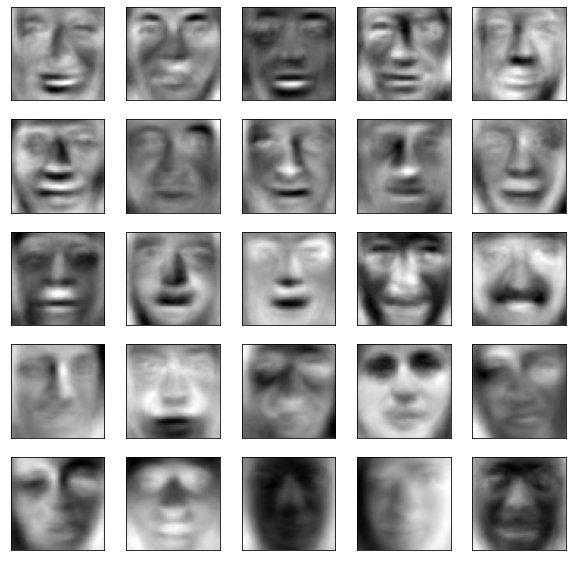

In [44]:
#Visualize the last 25 eigen-faces
va,ve =np.linalg.eigh(C)
new_images_1 = np.zeros((25,64,64))
for i in range(0,25):
    new_images_1[i,:,:] = np.reshape(ve[:,i+4071], (64,64))

plt.figure(figsize=(10,10))
for j in range(0,25):
    plt.subplot(5,5,j+1)
    plt.imshow(new_images_1[j,:,:],cmap=plt.cm.gray)
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)
